In [67]:
path = '/Users/arefeh/Desktop/tweet_api_new/cleaned/'+'#news AND #Covid'+'.txt'
path = '/Users/arefeh/Desktop/tweet_api_new/cleaned/'+'#cnn AND #Covid2020-02-24'+'.txt'
path = '/Users/arefeh/Desktop/tweet_api_new/cleaned/'+'#bbc AND #Covid2020-04-08'+'.txt'

In [68]:
with open (path,'r') as f:
    data = f.readlines()

In [69]:
len(data)

136

In [70]:
data_sent = ','.join(data)

In [71]:
data_sent[:100]

'joebiden have appointed as asst health secretary a transgender doctor who allegedly weaponized covid'

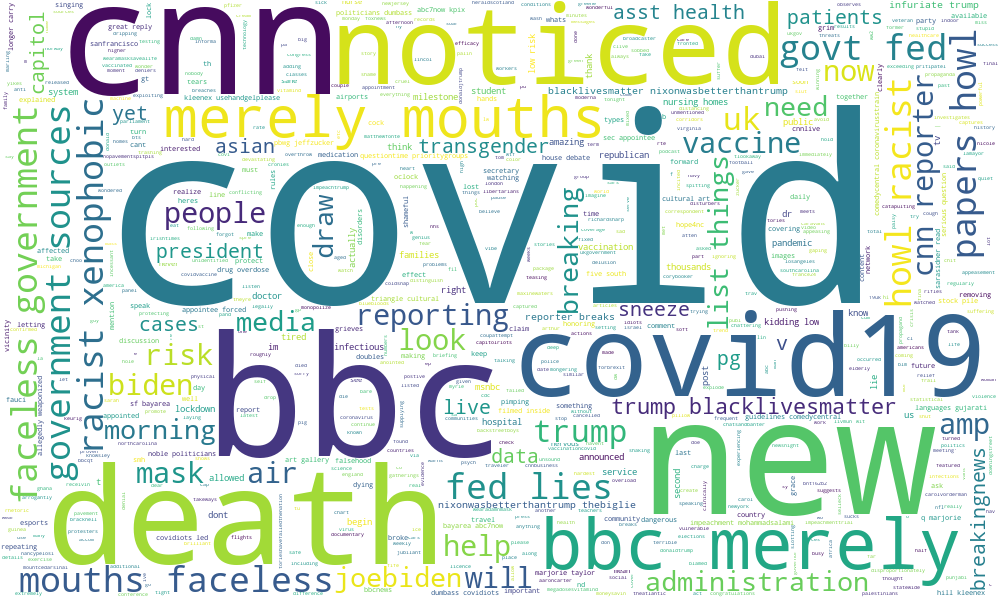

In [72]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width=1000, height=600)
# Generate a word cloud
wordcloud.generate(data_sent)
# Visualize the word cloud
wordcloud.to_image()

In [9]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
       
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data_words = list(sent_to_words(data))

data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arefeh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['present', 'people', 'hospitalized', 'covid', 'montreal', 'amid', 'health', 'care', 'resources', 'never', 'str']


In [10]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [ ]:
num_topics = 3

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

doc_lda = lda_model[corpus]

In [16]:
doc_lda = lda_model[corpus]

In [14]:
lda_model.print_topics()

[(0,
  '0.054*"covid" + 0.017*"take" + 0.016*"us" + 0.015*"hope" + 0.014*"thank" + 0.013*"vital" + 0.012*"role" + 0.011*"gives" + 0.010*"say" + 0.009*"thalapathyvijay"'),
 (1,
  '0.101*"covid" + 0.037*"deaths" + 0.023*"cases" + 0.018*"daily" + 0.013*"new" + 0.013*"response" + 0.010*"important" + 0.010*"know" + 0.009*"people" + 0.009*"admissions"'),
 (2,
  '0.049*"covid" + 0.030*"people" + 0.024*"eu" + 0.015*"afraid" + 0.012*"died" + 0.012*"says" + 0.012*"arrivals" + 0.009*"dying" + 0.008*"almost" + 0.007*"remaining"'),
 (3,
  '0.073*"covid" + 0.018*"home" + 0.016*"million" + 0.016*"stay" + 0.015*"mask" + 0.014*"wear" + 0.009*"ontario" + 0.009*"amp" + 0.009*"among" + 0.008*"two"'),
 (4,
  '0.061*"covid" + 0.014*"amp" + 0.012*"vaccine" + 0.010*"leave" + 0.009*"great" + 0.009*"done" + 0.009*"statement" + 0.008*"families" + 0.008*"national" + 0.008*"today"'),
 (5,
  '0.054*"covid" + 0.015*"new" + 0.009*"poll" + 0.009*"press" + 0.009*"bbc" + 0.009*"handling" + 0.008*"approval" + 0.008*"get"